# 3.2 Preprocessing

It's time to clean up our dataset for machine learning. We don't want to get rid of many outliers, so our model won't be overfited. We only aim to remove scribbles.

### 1. Adding the libraries we need

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import pickle

from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore', category=FutureWarning)

### 2. Read in the feature dataset from the result of 2.1 notebook

In [2]:
directory = "../dataset-numpy/"

dataset = pd.read_csv(os.path.join(directory, '2.1 - features.csv'), delimiter=',', header=0)

dataset.describe(include='all')

,label,area,axis_major_length,axis_minor_length,eccentricity,h_sym_err_percent,v_sym_err_percent
count,1472,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN
top,ash,NaN,NaN,NaN,NaN,NaN,NaN
freq,164,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6107.643342,143.646528,104.686584,0.639563,0.303743,0.344802
std,NaN,1779.865675,16.273829,14.929751,0.168373,0.090908,0.135186
min,NaN,1469.000000,110.482240,14.198591,0.000000,0.000000,0.000000
25%,NaN,5013.250000,132.328105,94.841866,0.556672,0.251919,0.248959
50%,NaN,5990.000000,142.231762,103.136358,0.670292,0.309899,0.355879
75%,NaN,6853.500000,153.240164,115.644205,0.754218,0.361375,0.450832


### 3. Remove unusable images

There images that are just scribbles. There is no reason to do imputation on these images as they are not real images. We will remove them from the dataset.

We remove all images with 0 eccentricity, as they are just scribbles, since no real rune has 0 eccentricity.

In [3]:
dataset_cleaned = dataset.copy()

# Deal with outliers by removing elements who's eccentricity is 0
dataset_cleaned = dataset_cleaned[dataset_cleaned['eccentricity'] != 0]

dataset_cleaned.describe(include='all')

,label,area,axis_major_length,axis_minor_length,eccentricity,h_sym_err_percent,v_sym_err_percent
count,1446,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN
top,ash,NaN,NaN,NaN,NaN,NaN,NaN
freq,162,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5940.992393,143.654948,103.994480,0.651062,0.309205,0.351002
std,NaN,1285.099755,16.419462,14.134005,0.146175,0.081994,0.128166
min,NaN,1469.000000,110.482240,14.198591,0.105603,0.052680,0.030307
25%,NaN,4995.250000,132.102996,94.669247,0.564980,0.256113,0.254683
50%,NaN,5950.500000,141.979676,102.965786,0.673206,0.311785,0.358025
75%,NaN,6802.500000,153.354823,114.501330,0.755008,0.362350,0.451873


We also remove images who's area is grater than 1400 pixels. We looked at our dataset in step 2.1, and noticed in our violinplots that there are almost no runes (with the exception of some outliers) that have an area greater than 1400 pixels. We simply remove these data points as they are most likely scribbles.

In [4]:
# Remove images whose 'area' is grater than 14000
dataset_cleaned = dataset_cleaned[dataset_cleaned['area'] < 14000]

### 4. Group up the images by label with a dictionary

With this step we can create separate pandas dataframes for each label. This will make it easier to do the imputation.

In [5]:
unique_labels = dataset_cleaned['label'].unique()

images_dict = {elem : pd.DataFrame() for elem in unique_labels }

for key in images_dict.keys():
    images_dict[key] = dataset_cleaned[:][dataset_cleaned.label == key]

print("Print the number of images for each label")
for label in images_dict:
    print(label, len(images_dict[label]))

Print the number of images for each label
joy 113
ash 162
spear 127
gift 124
oak 104
sun 102
need 133
elk-sedge 114
bow 141
serpent 108
tyr 109
wealth 109


### 5. Show the preprocessed data

We now show the cleaned dataset. We don't have any missing data, so we don't need to impute and data. Also, we don't clean up any more outliers as we want to avoid our model to be overfitted. We can observe that most of our drastic outliers are gone. We still have some minor outliers, but we will leave them in the dataset as they can help our model to be more robust.

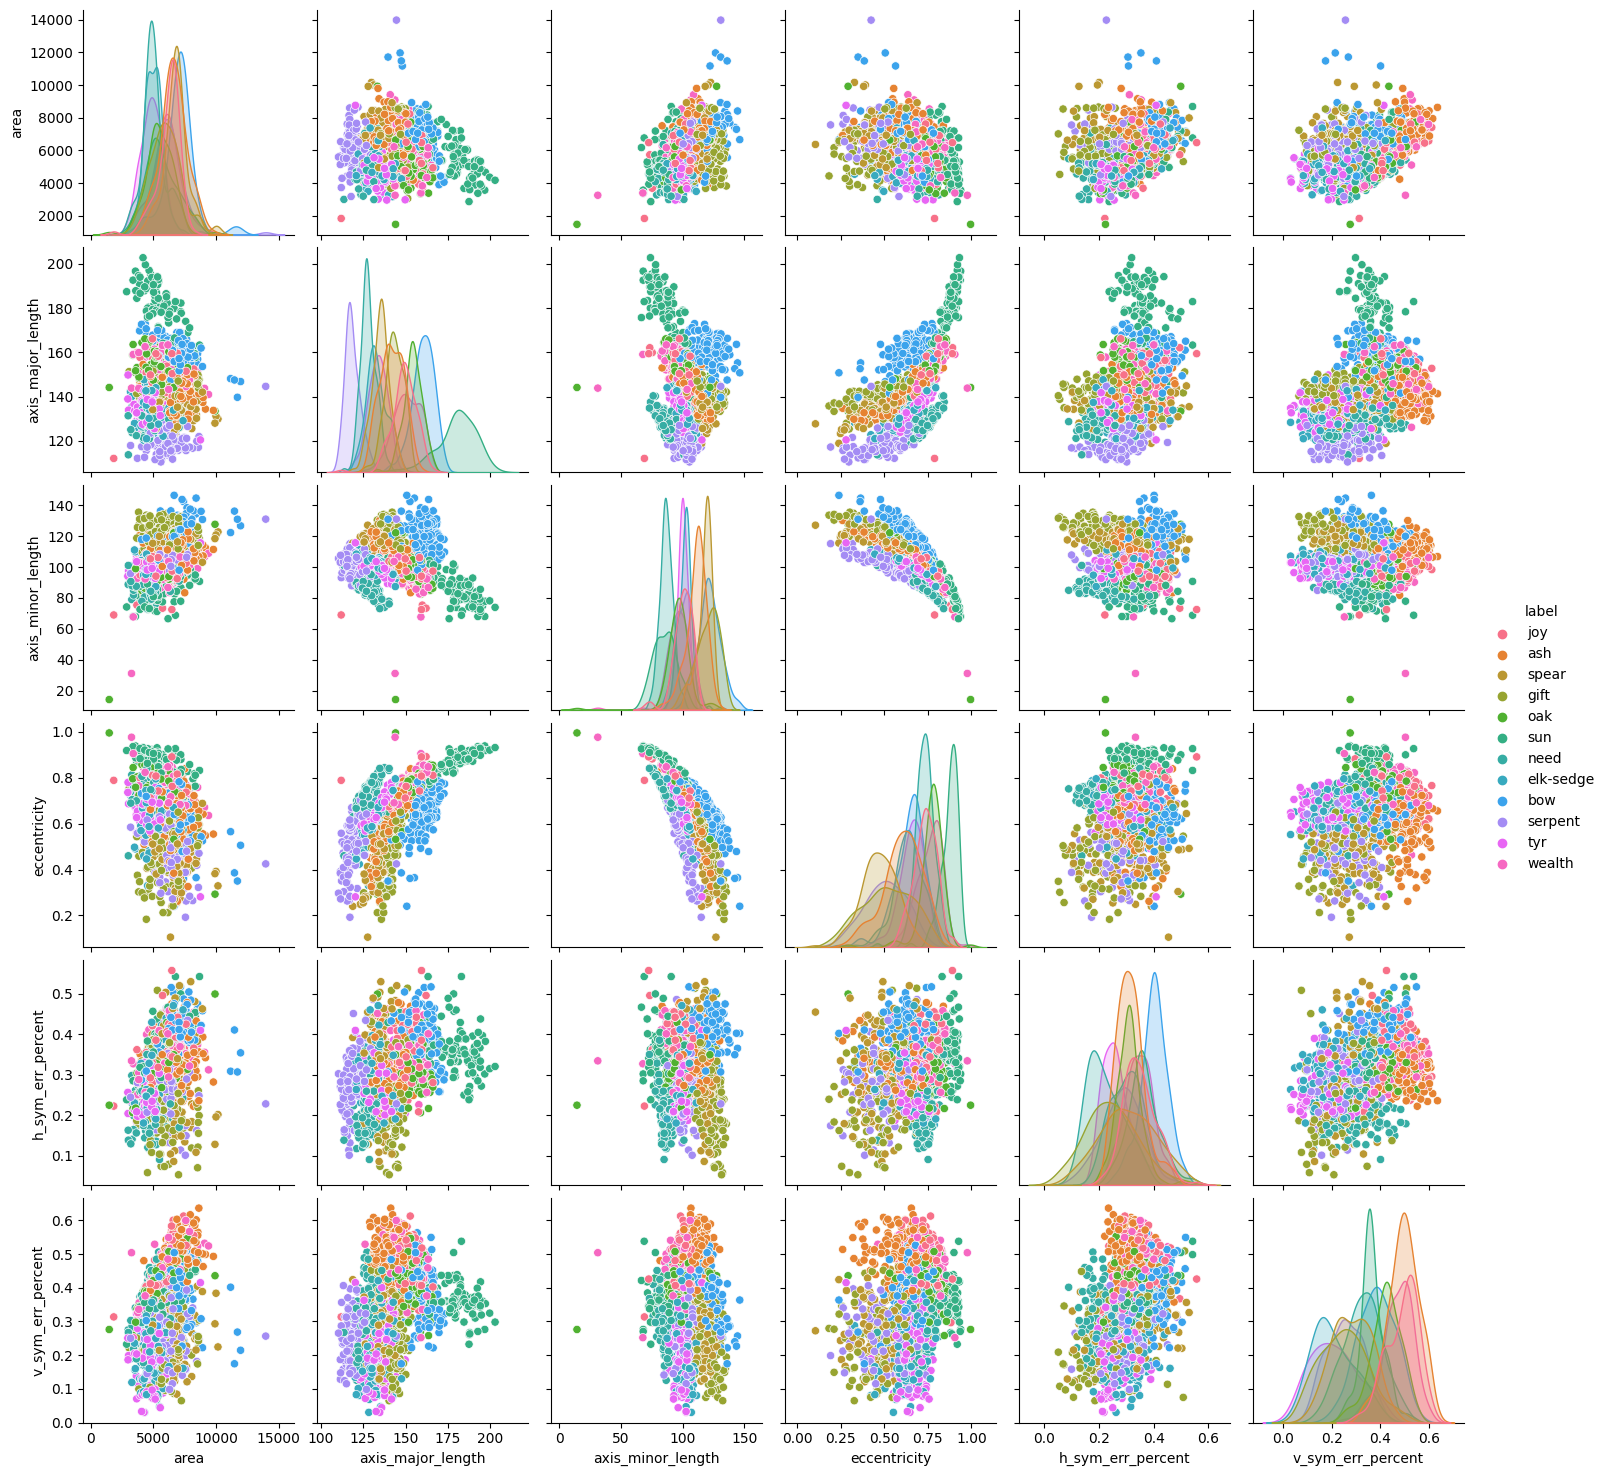

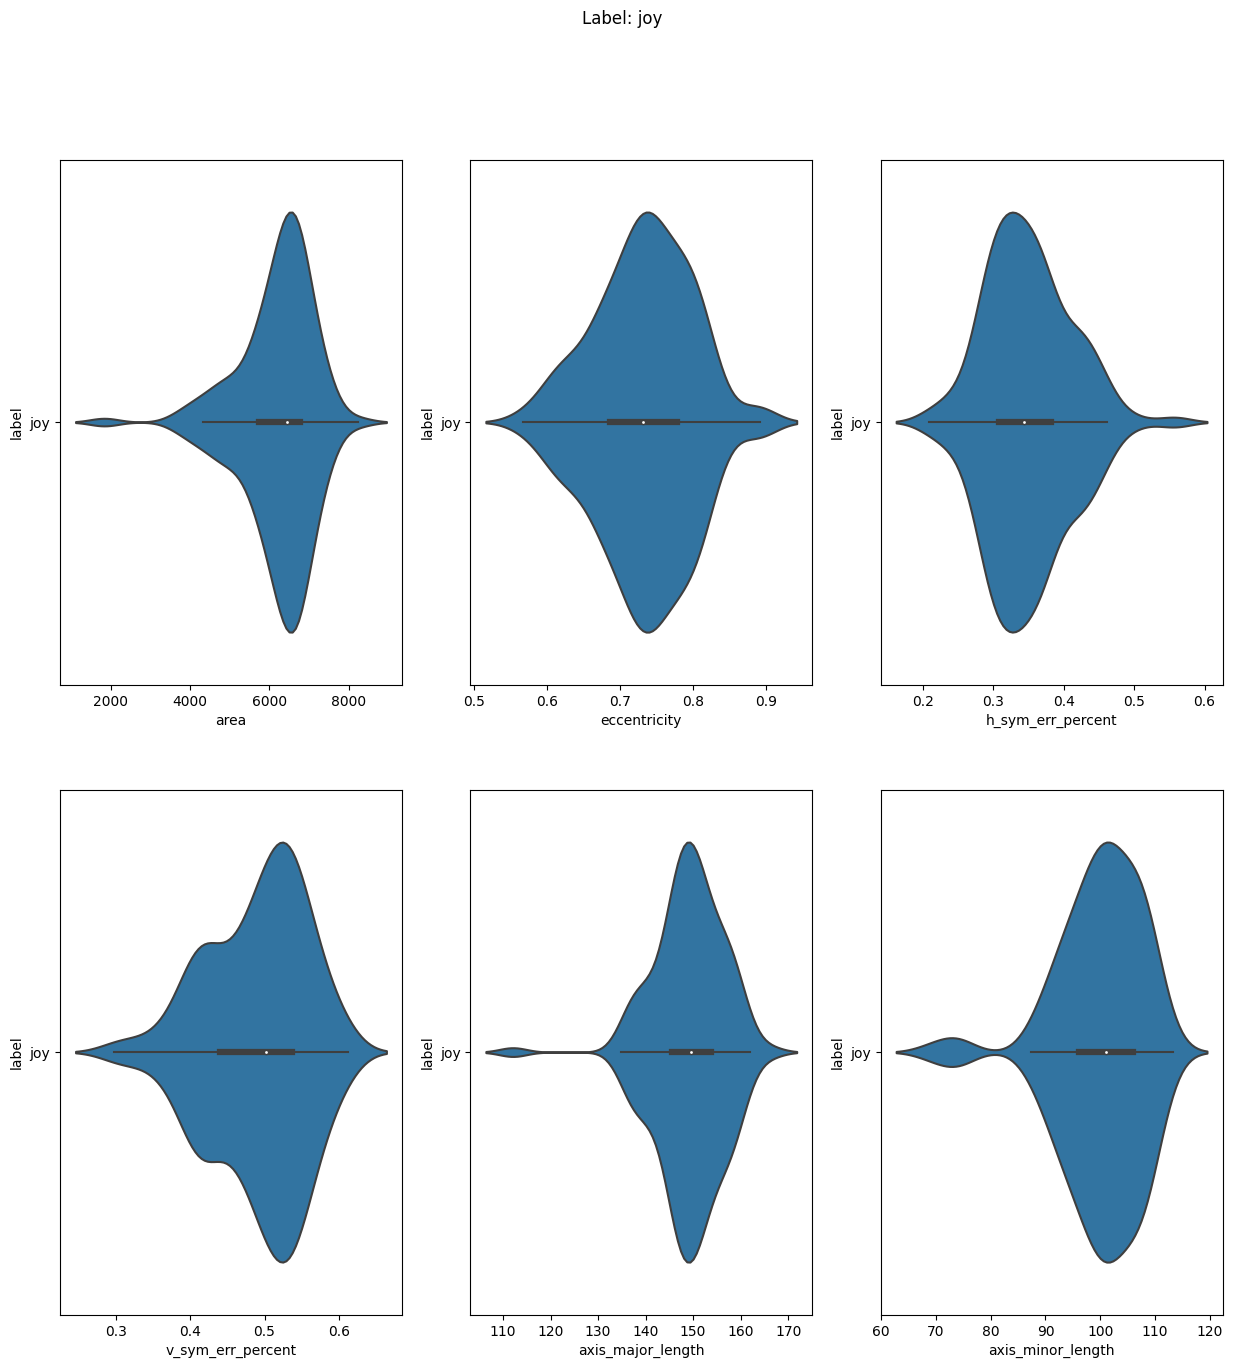

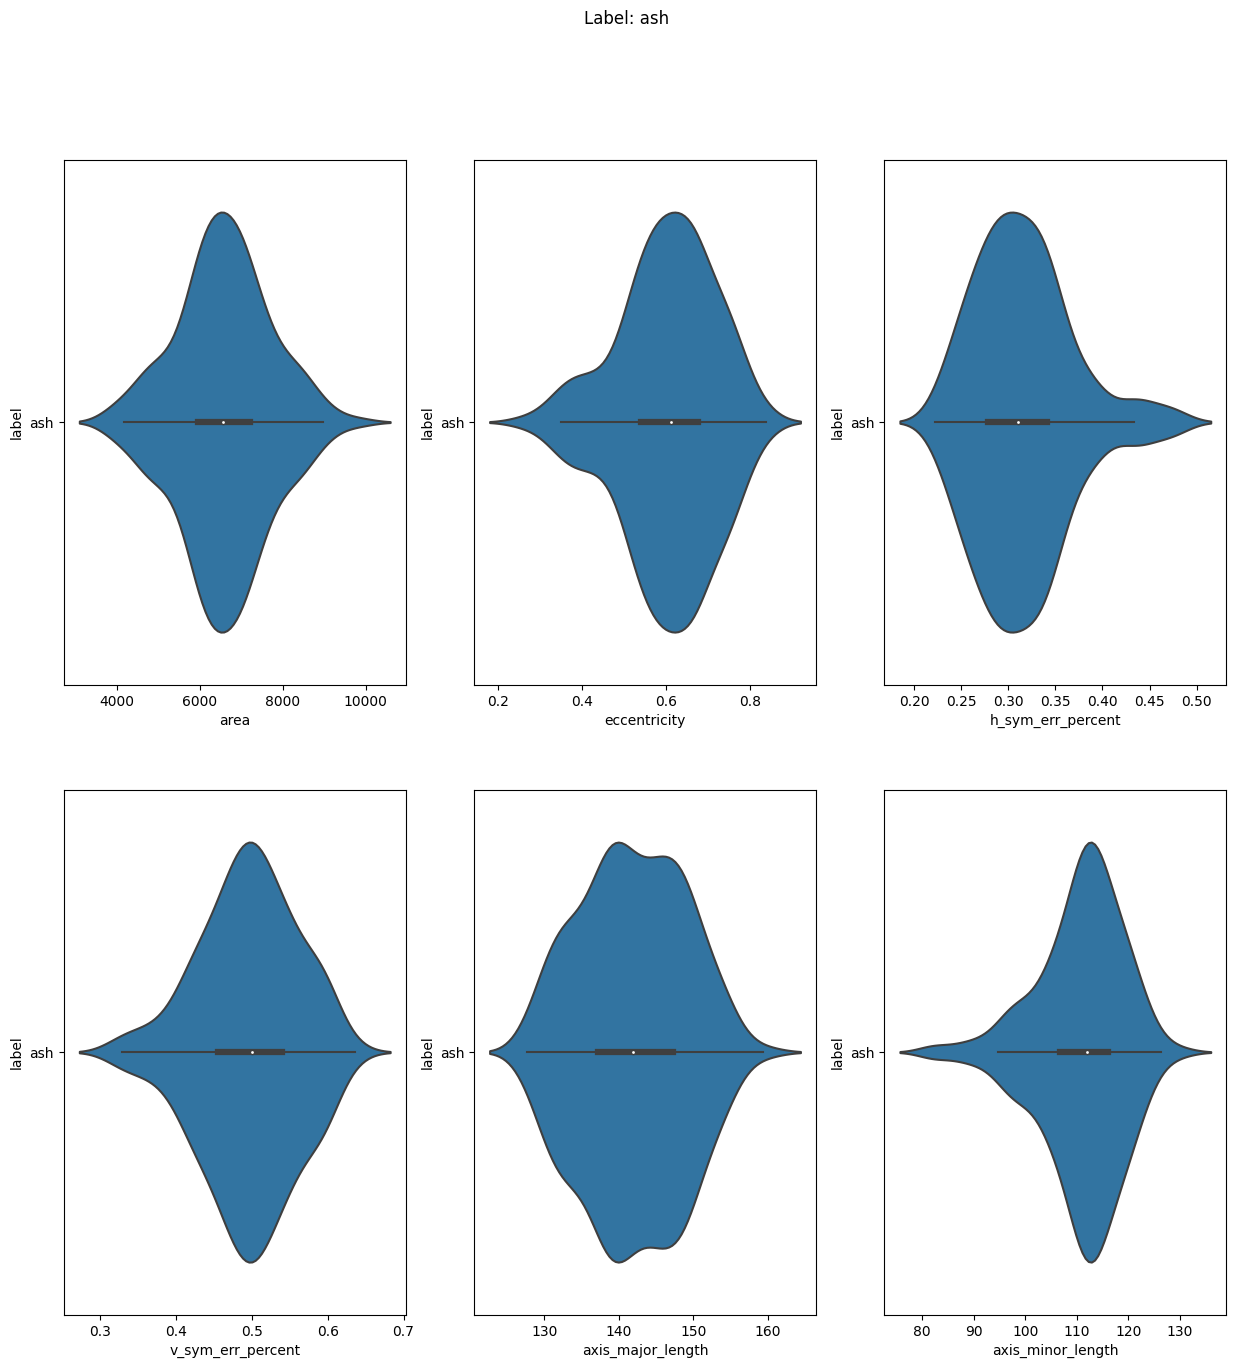

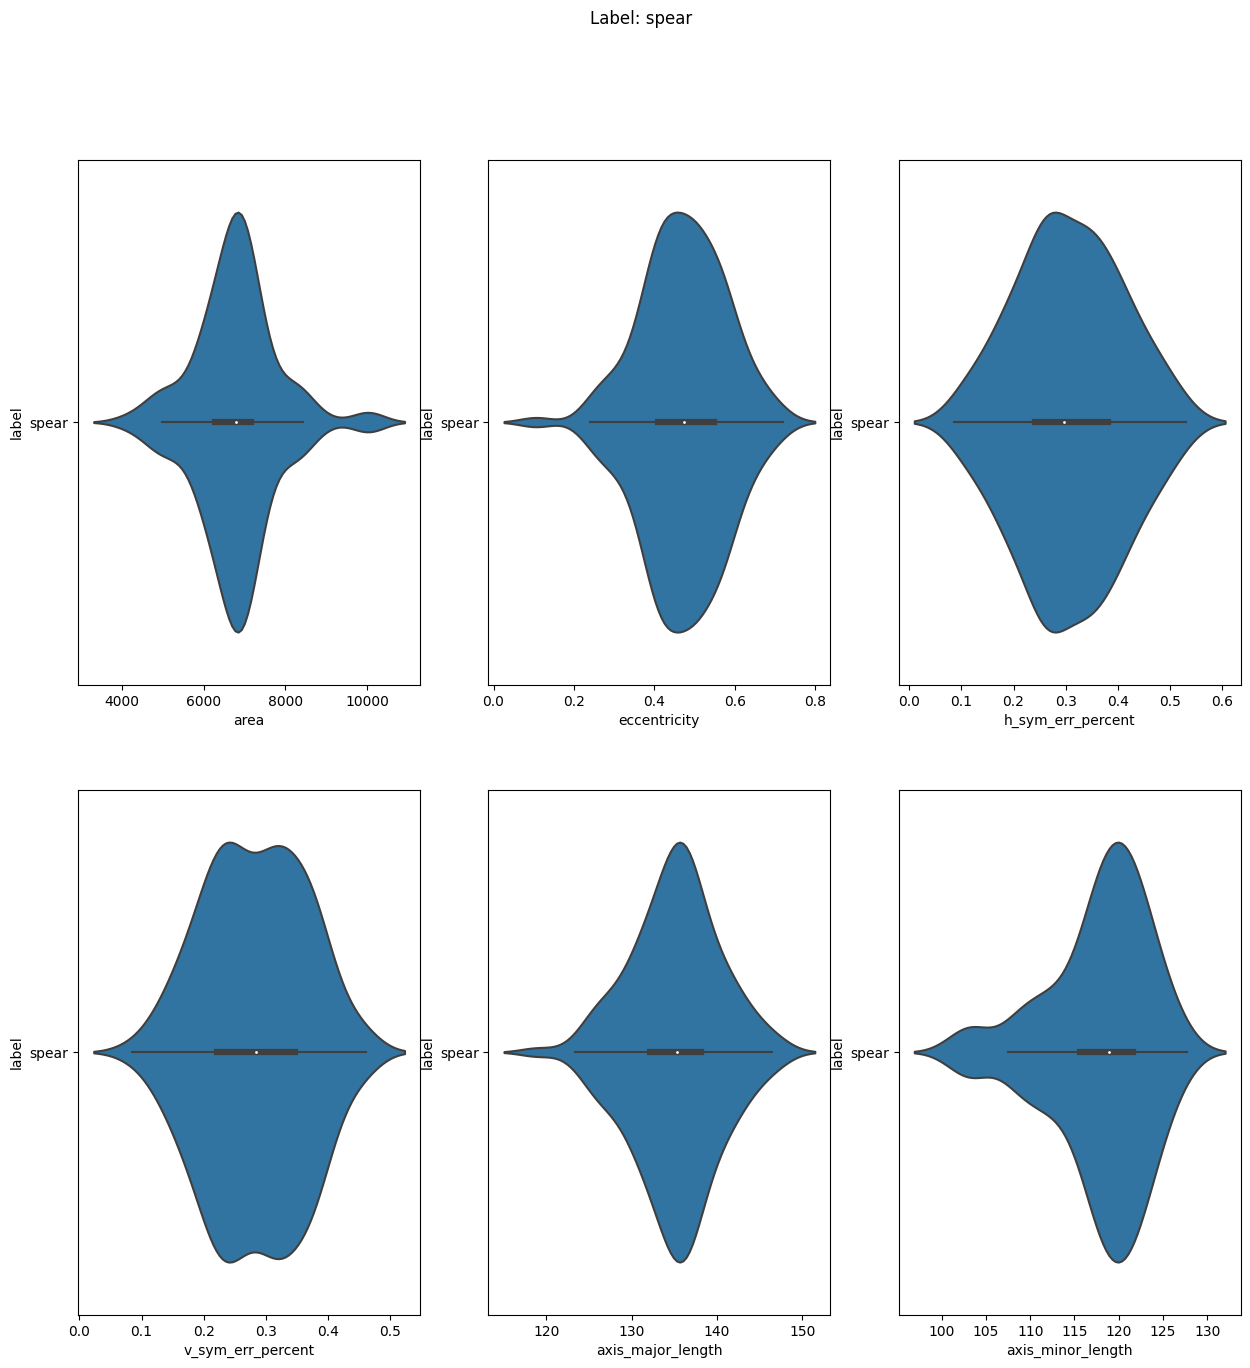

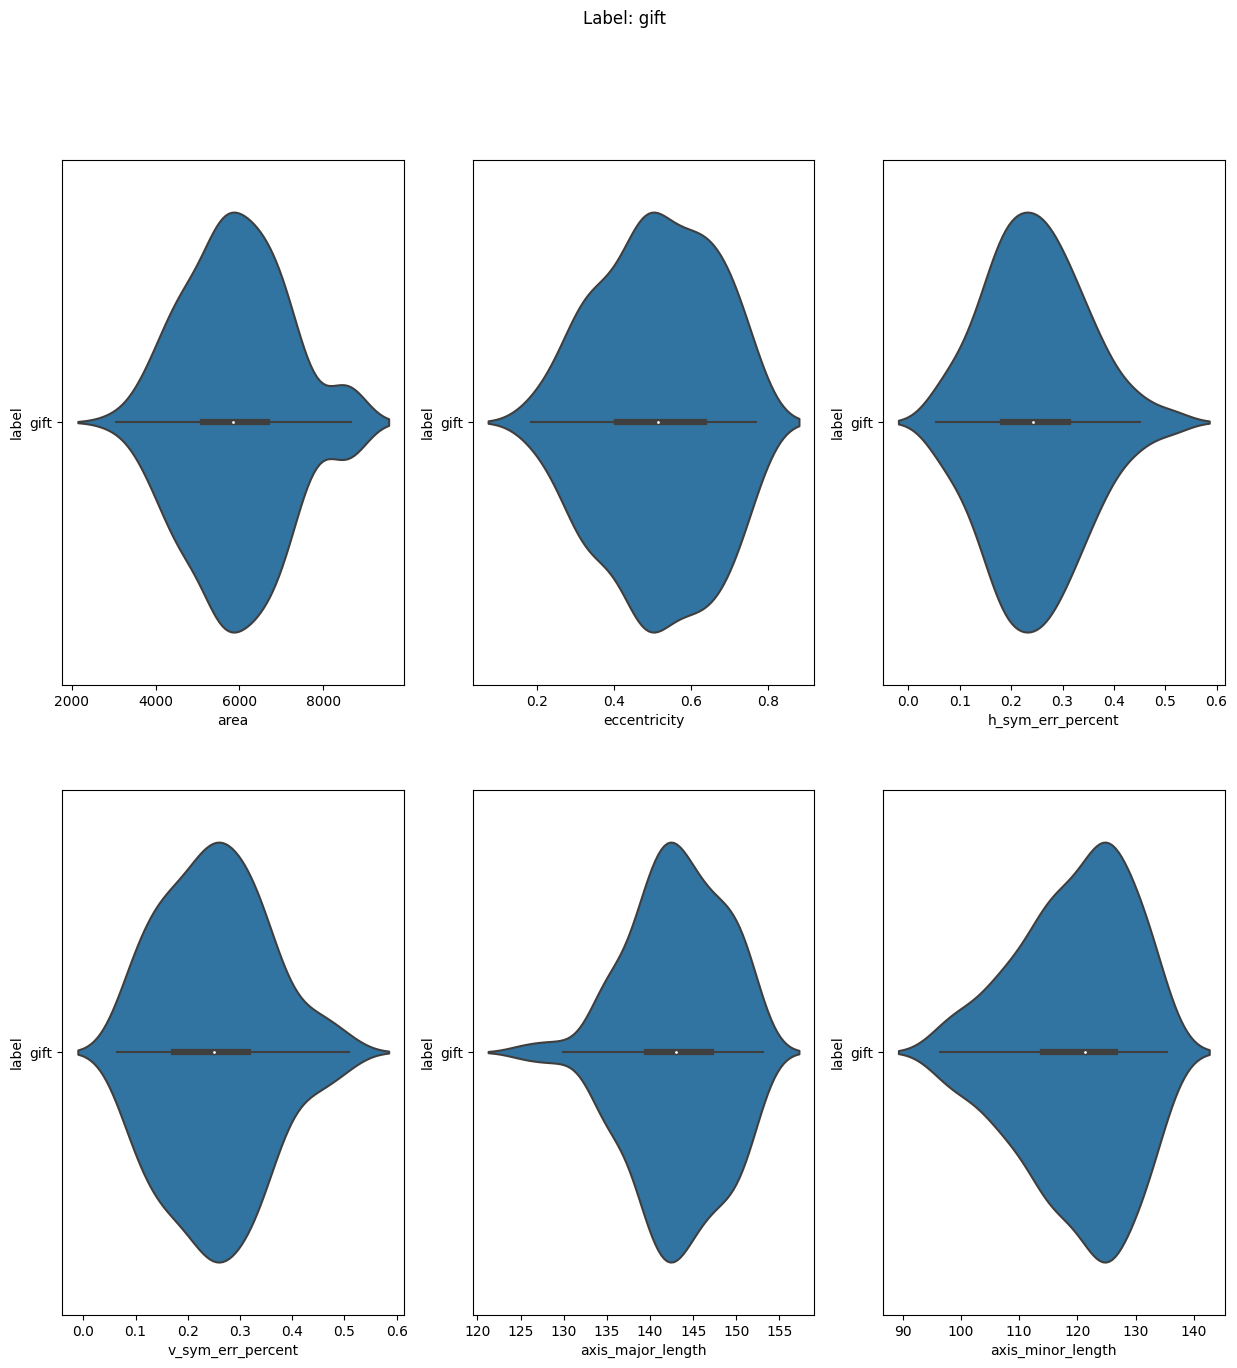

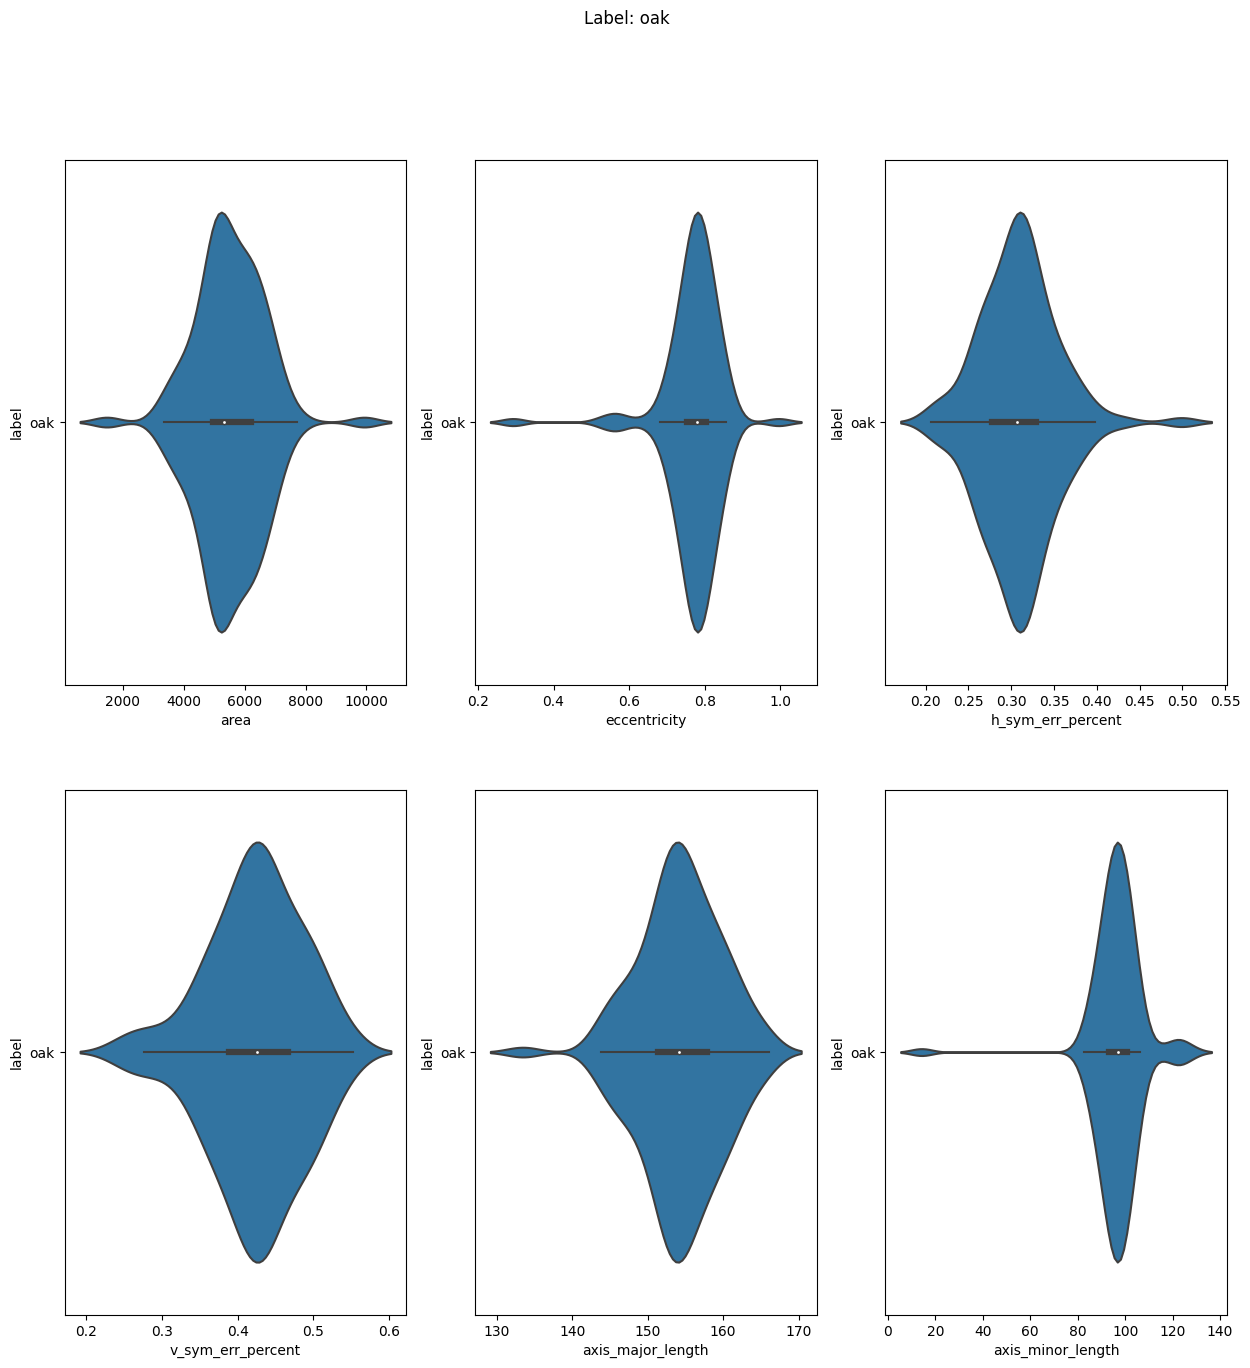

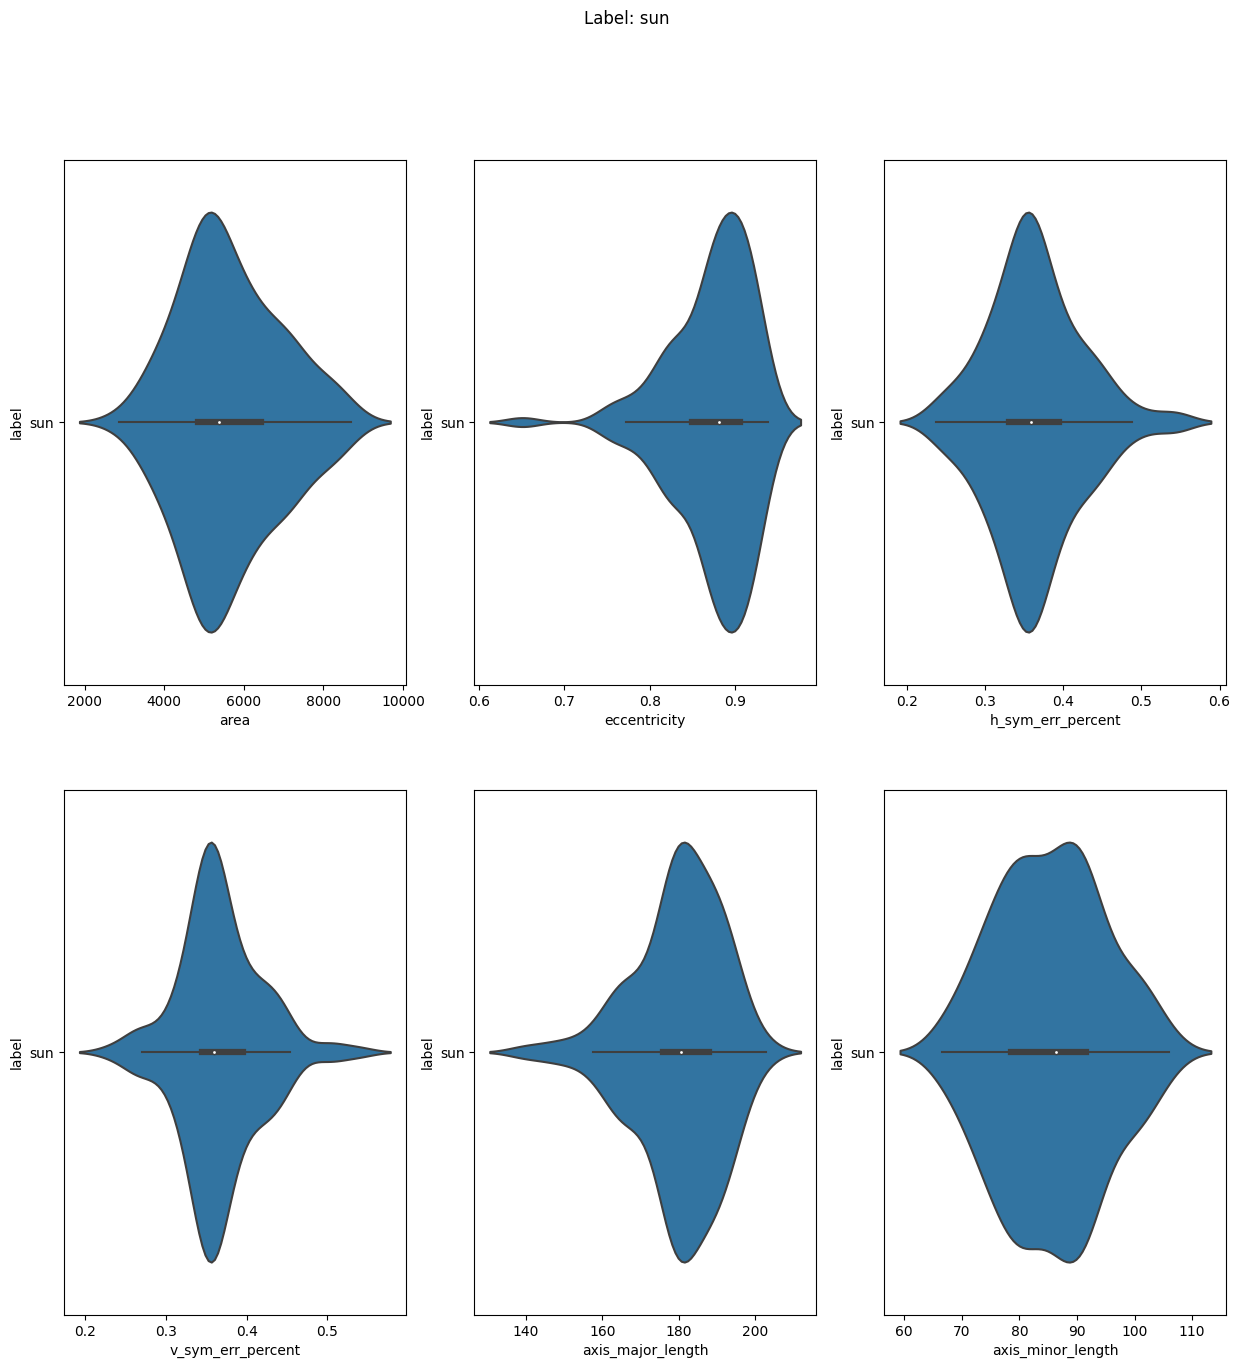

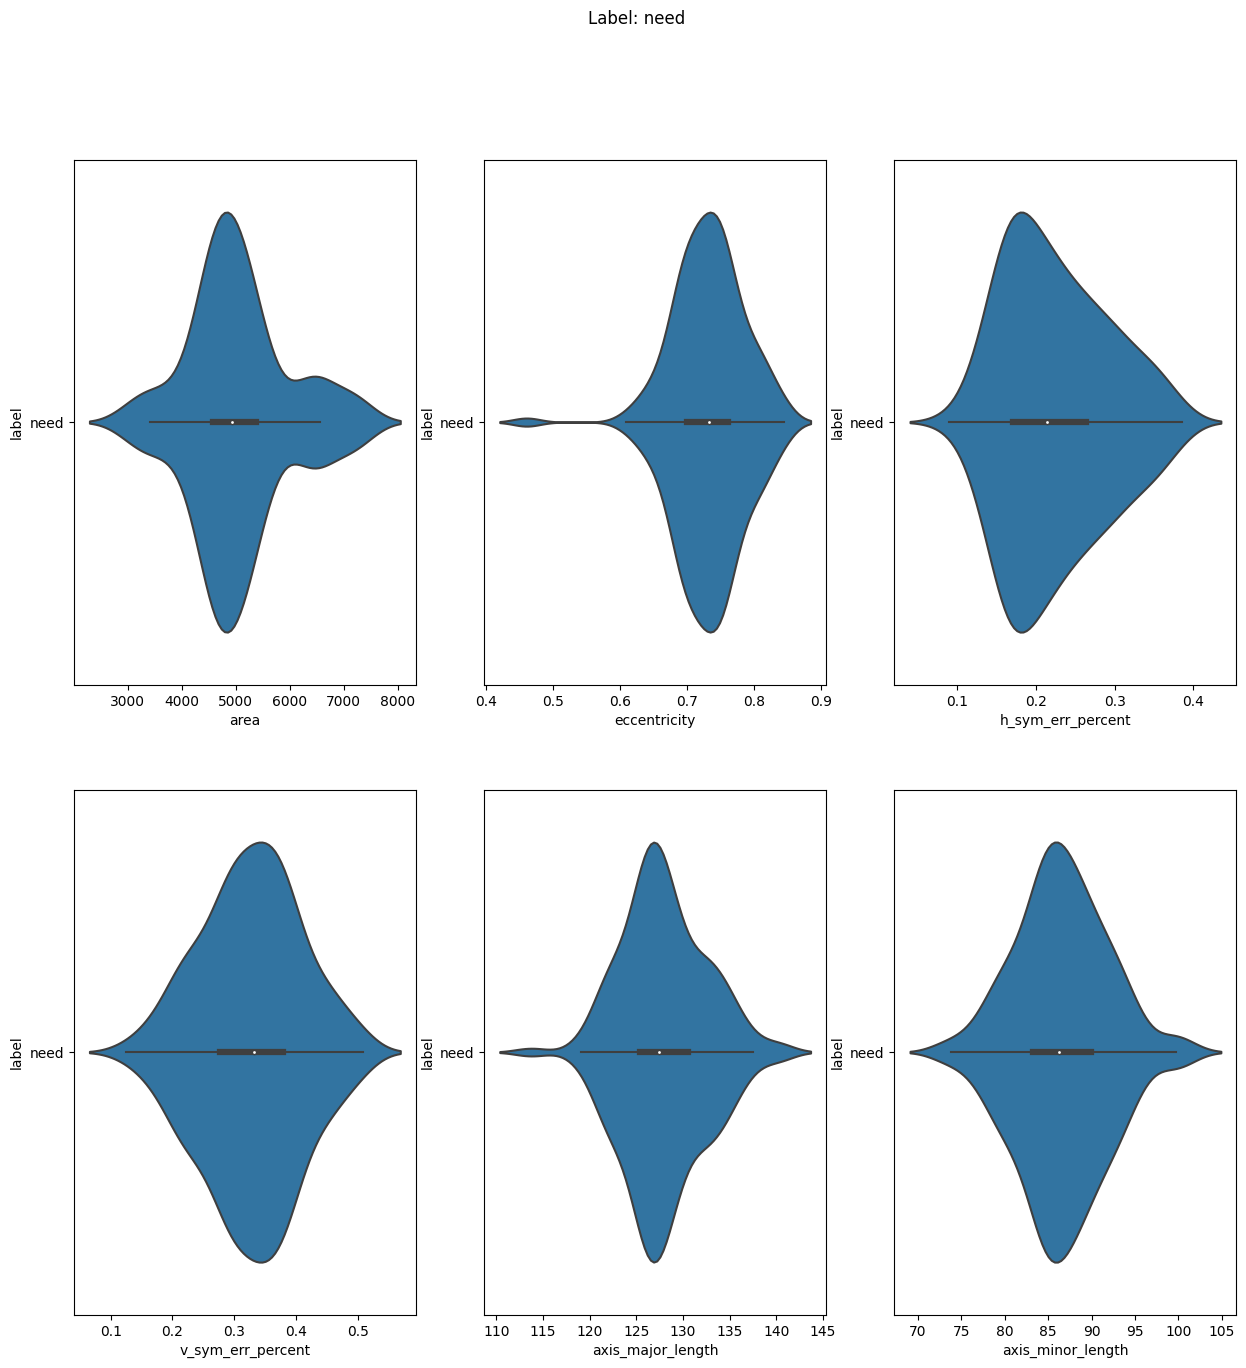

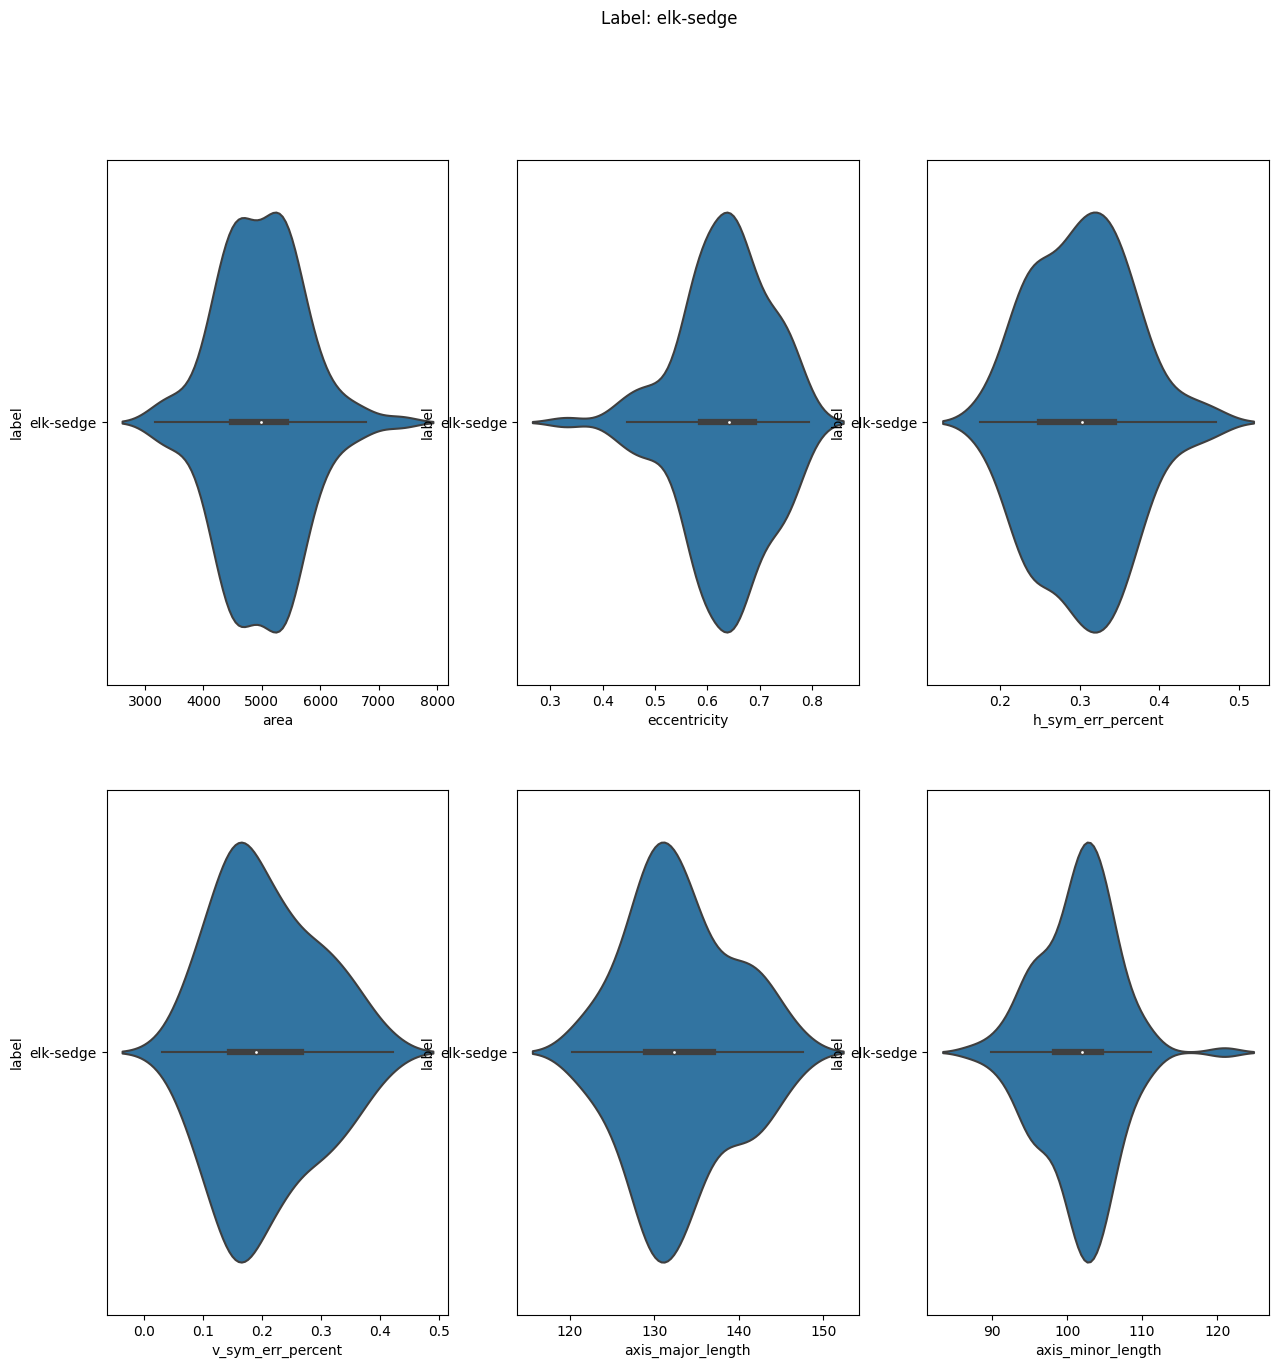

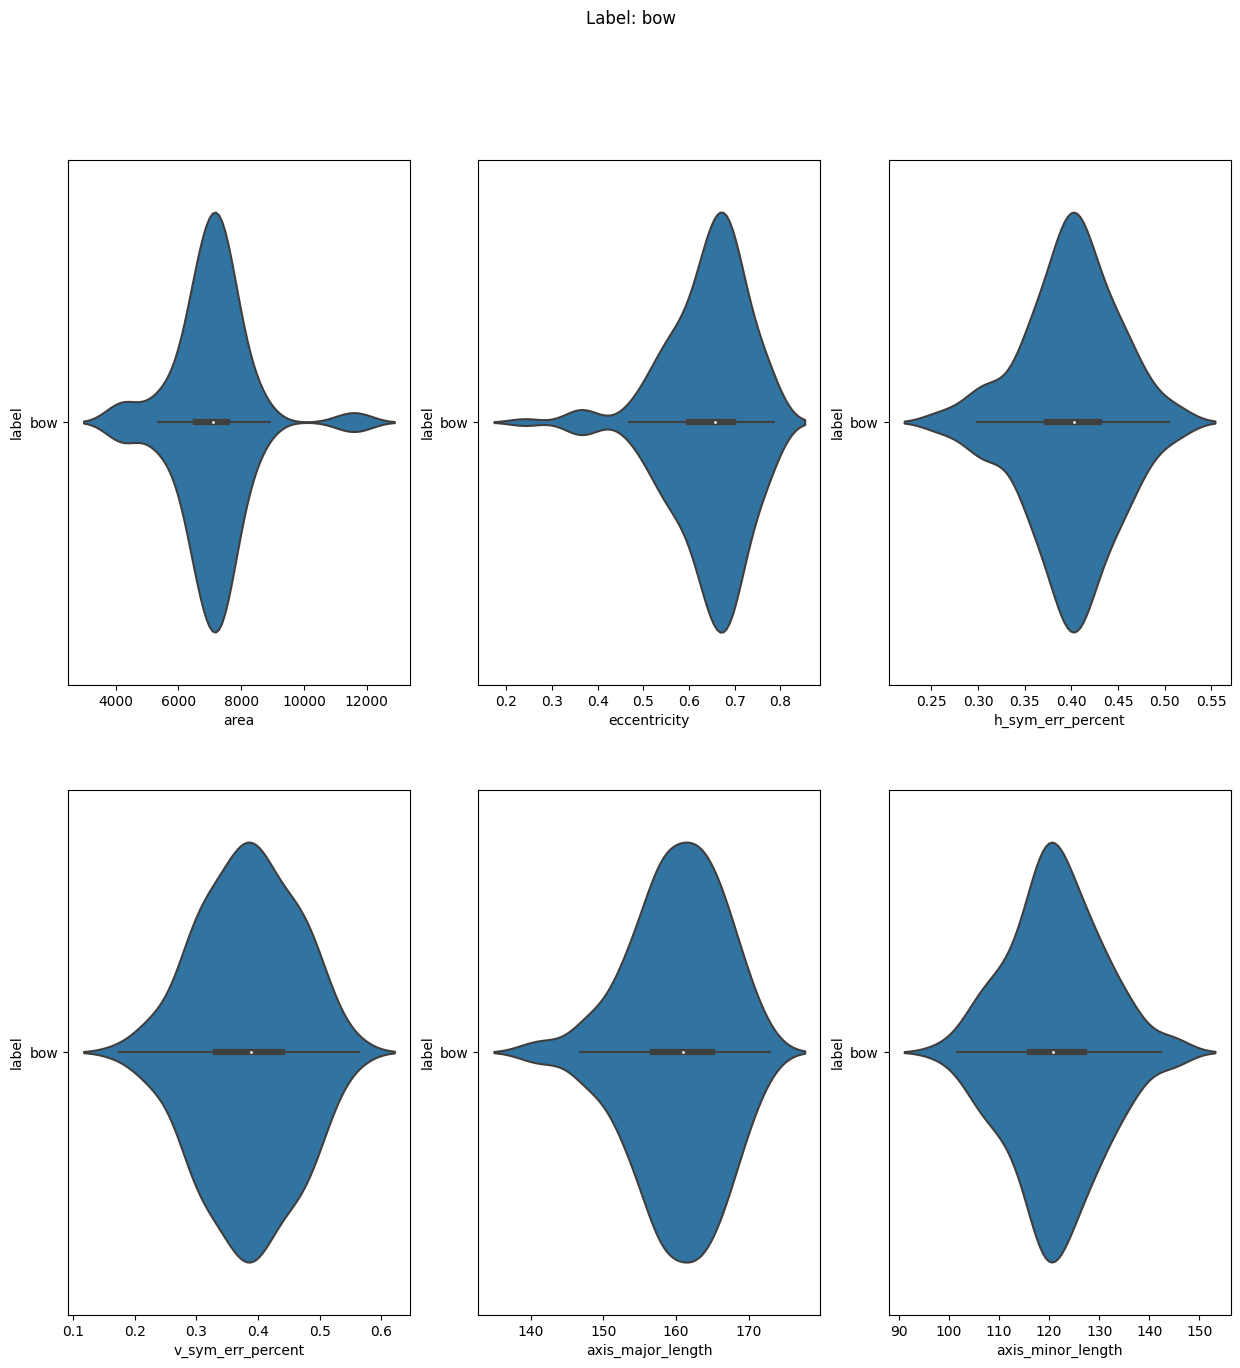

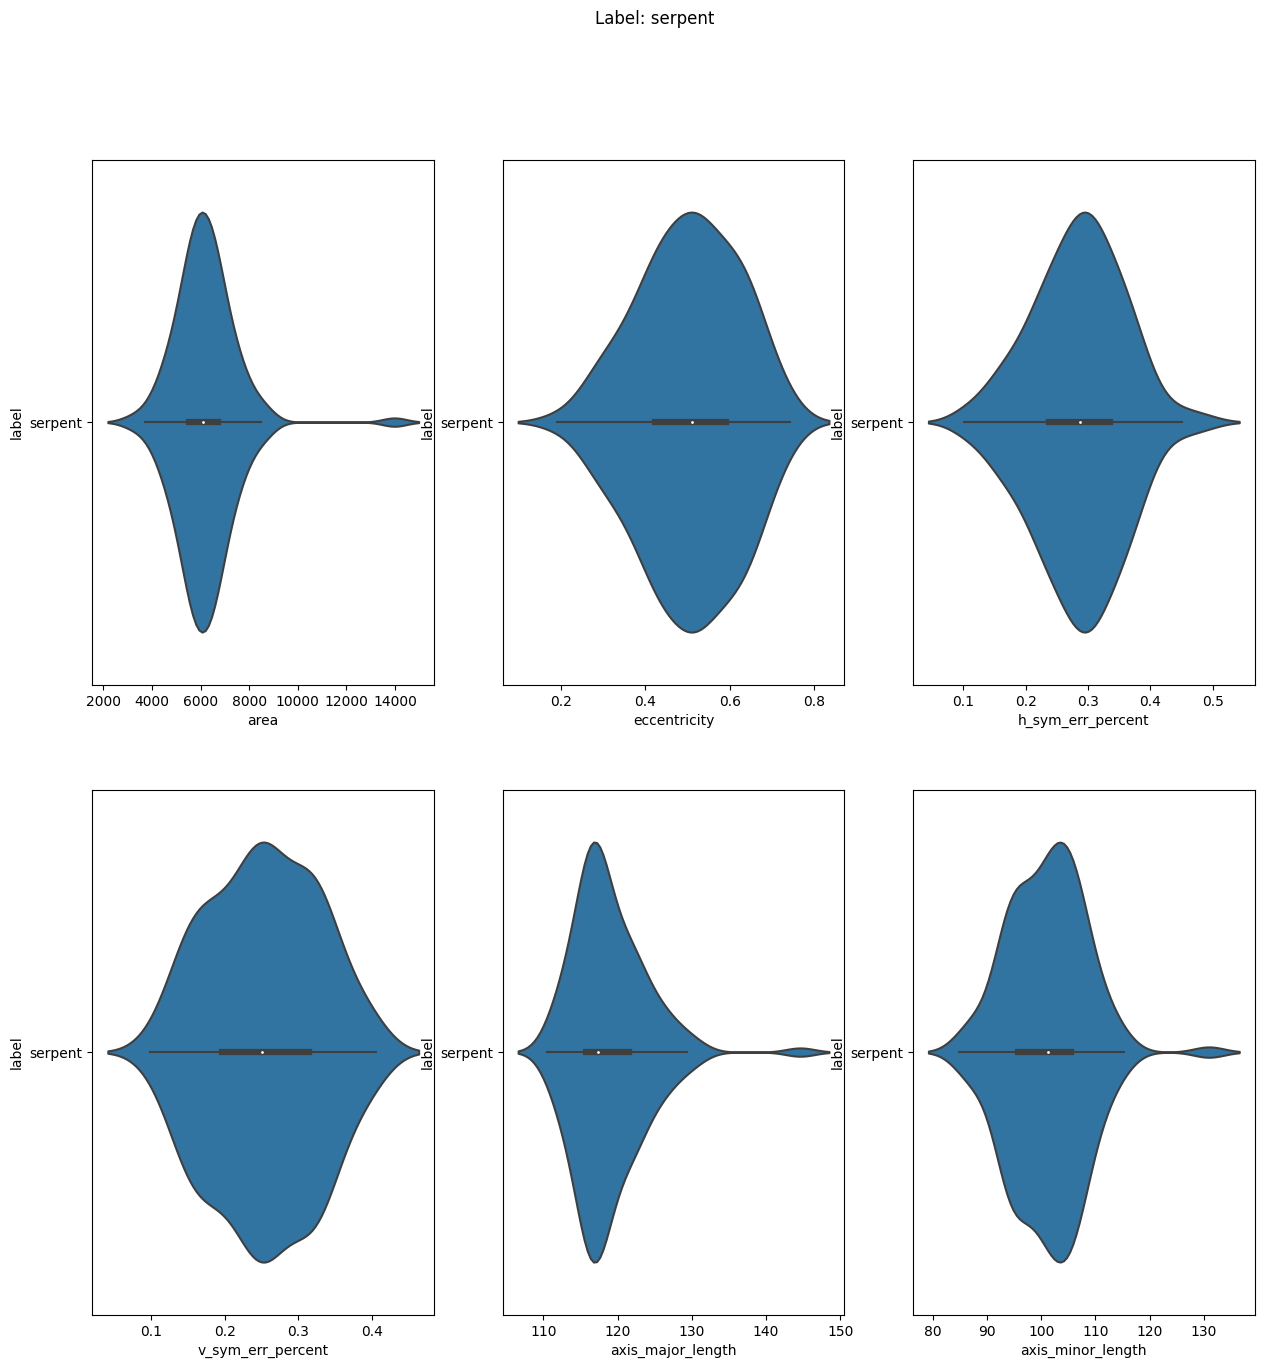

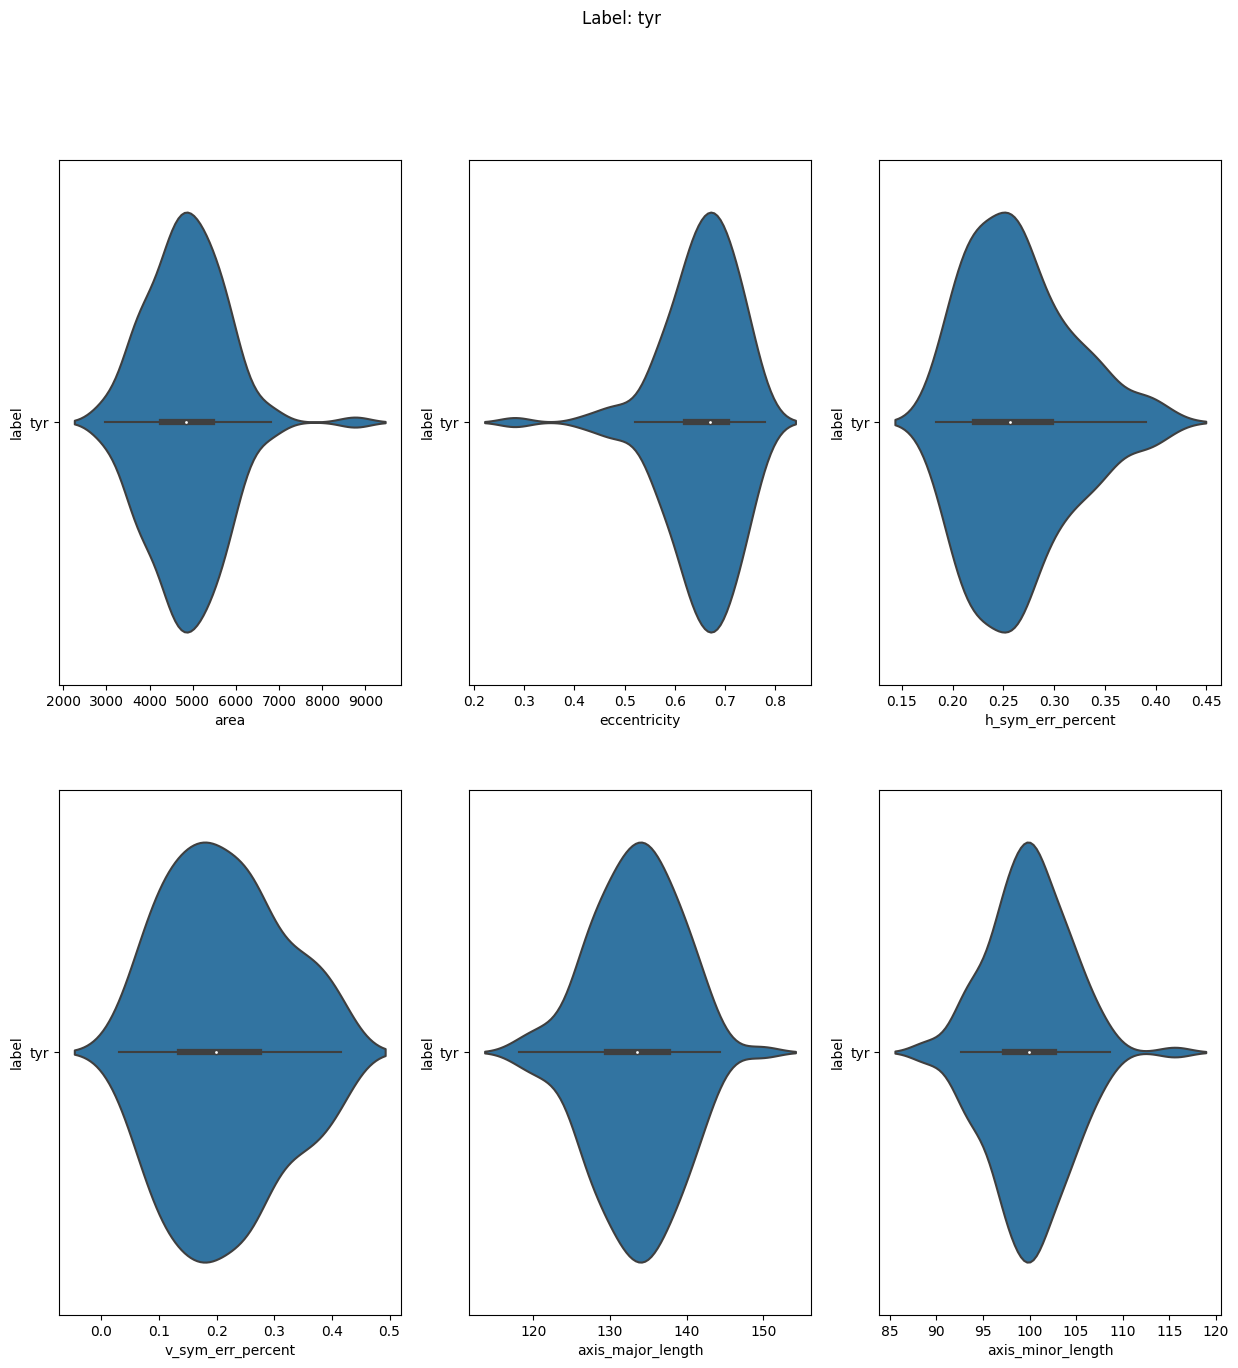

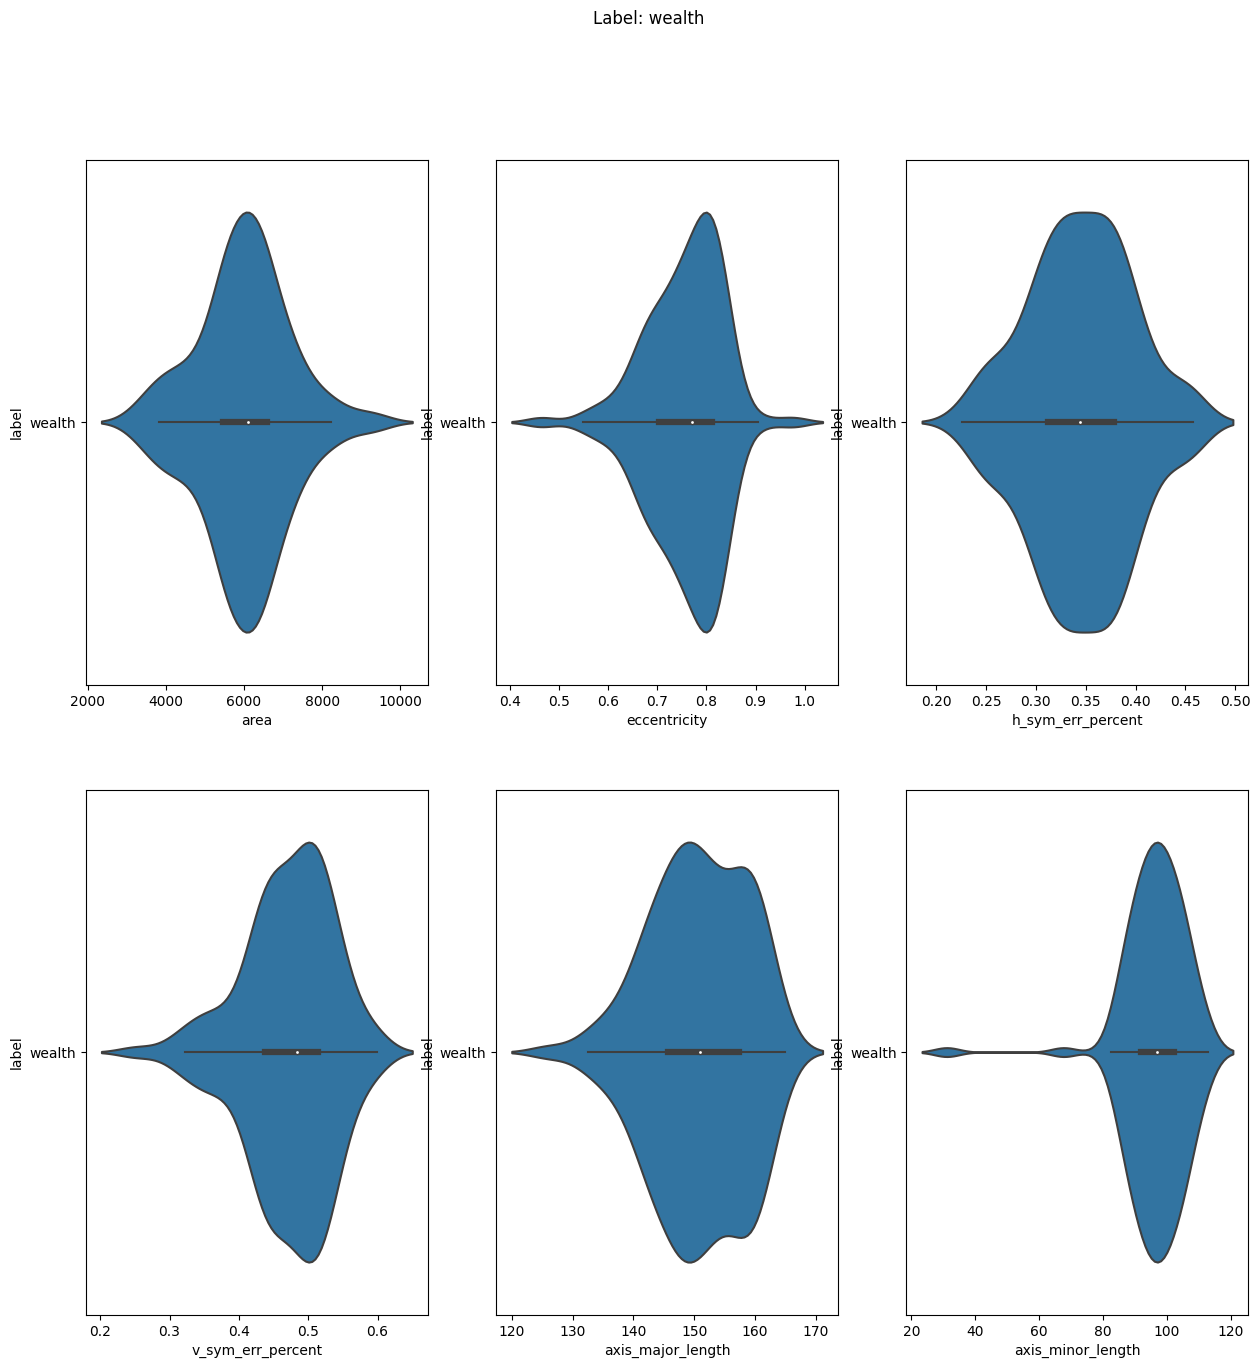

In [6]:
sns.pairplot(dataset_cleaned, hue="label")

for i, (label, image_set) in enumerate(images_dict.items()):
    fig, axs = plt.subplots(2, 3, figsize=(15, 15))
    fig.suptitle(f'Label: {label}')

    sns.violinplot(data=image_set, x='area', y='label', ax=axs[0, 0])
    sns.violinplot(data=image_set, x='eccentricity', y='label', ax=axs[0, 1])
    sns.violinplot(data=image_set, x='h_sym_err_percent', y='label', ax=axs[0, 2])

    sns.violinplot(data=image_set, x='v_sym_err_percent', y='label', ax=axs[1, 0])
    sns.violinplot(data=image_set, x='axis_major_length', y='label', ax=axs[1, 1])
    sns.violinplot(data=image_set, x='axis_minor_length', y='label', ax=axs[1, 2])
    plt.show()

### 6. Save the data

In [7]:
# make csv file
directory = "../dataset-numpy/" 
path = os.path.join(directory, '3.1 - features.csv')

dataset_cleaned.to_csv(path, index=False)

### 7. Create a reusable MinMaxScaler for all of our models and the web application

We create and fit a scaler here so that we can import it in later steps. We do not scale the data here, as the scaling creates 4 different dataset (X and y for training and testing), and it it difficult to save and use them later.

In [8]:
# create scaler and dump it to file
features = dataset_cleaned.loc[:, dataset_cleaned.columns != 'label']

scaler = MinMaxScaler()
scaler.fit(features)

directory = "../classifiers/" 
path2 = os.path.join(directory, '3.1 - scaler.pkl')
with open(path2, 'wb') as file:
    pickle.dump(scaler, file)